# Load libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")

# First view of the training data

In [72]:
df = df_train
df = df.astype({"Pclass": "category", "Sex": "category", "Embarked": "category", "Survived": "category"})
# print(df.info())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
df.describe(include="category")

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


In [75]:
print(f"Number of samples = {df.shape[0]}, number of attributes = {df.shape[1]}\n")
# print(f"Attributes = {df.columns}\n")
print(f"Number of duplicates = {sum(df.duplicated())}\n")
print(f"Percentage of missing values = {round(df.isna().sum().sum() / df.size * 100, 1)}\n")

print("Data Types\n---------------------")
print(df.dtypes)
print("")

print("Missing Values\n---------------------------")
print(df.isna().sum())
print("")

# print(df.isna().sum().sum()

# df.describe()
# df.describe(include="object")


Number of samples = 891, number of attributes = 12

Number of duplicates = 0

Percentage of missing values = 8.1

Data Types
---------------------
PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

Missing Values
---------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



# Taking natural log

In [ ]:
df_num = df.select_dtypes(include=["int64", "float64"]).drop(["PassengerId", "Survived"], axis="columns")
# for col in ["Fare"]:
#     df_num[col] = np.log(df_num[col])
# df_num.head()
sum(df_num["Fare"] == 0) # 15 people got on for free

15

# Univariate analysis

In [76]:
df_num = df.select_dtypes(include=["int64", "float64"]).drop("PassengerId", axis="columns")
df_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


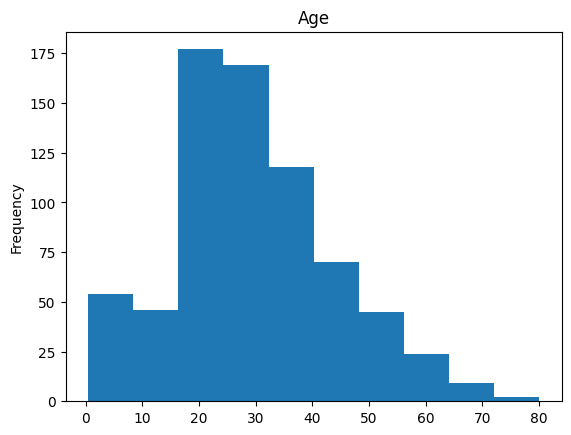

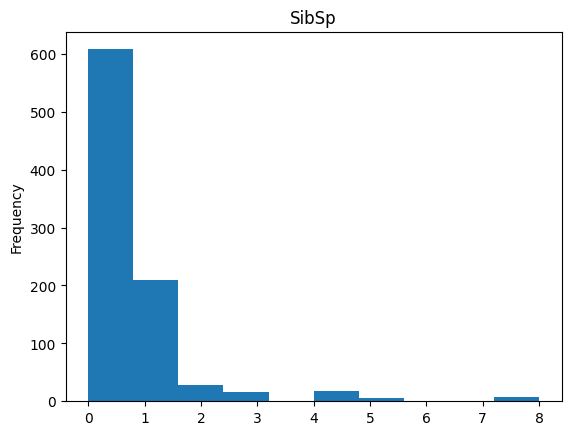

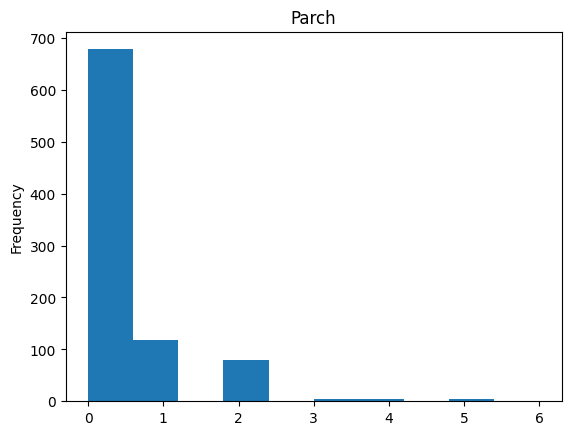

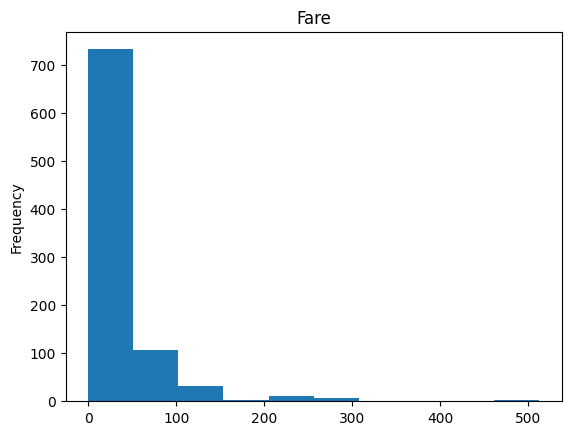

In [77]:
for col in df_num.columns:
    df_num[col].plot(kind="hist", title=col)
    plt.show()

In [78]:
df_cat = df.select_dtypes(include=["category"])
df_cat.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


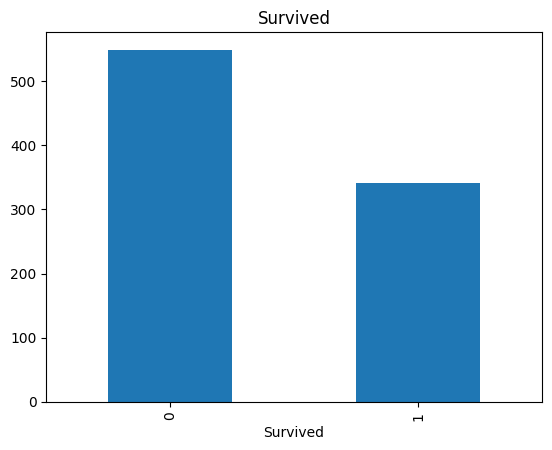

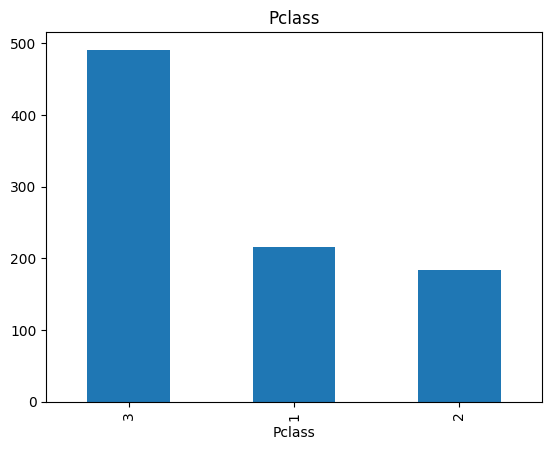

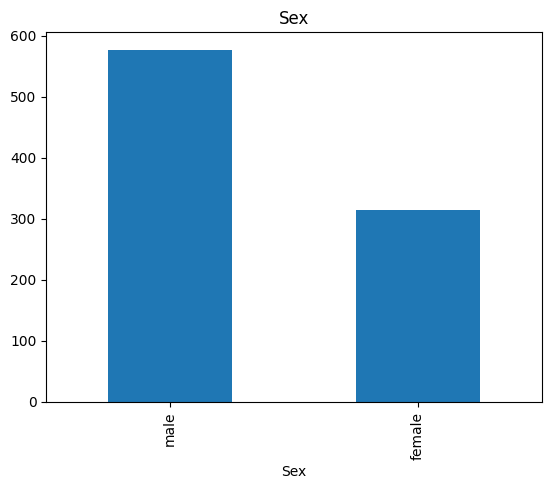

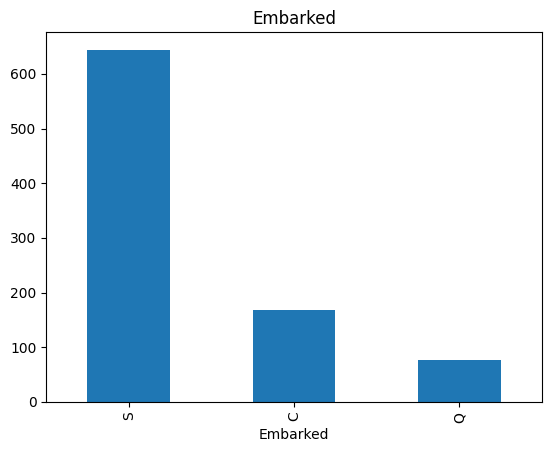

In [79]:
for col in df_cat.columns:
    df_cat[col].value_counts().plot(kind="bar", title=col)
    plt.show()

# Multivariate analysis

In [80]:
df_num = df.select_dtypes(exclude=["category", "object"]).drop("PassengerId", axis="columns")
df_num.columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

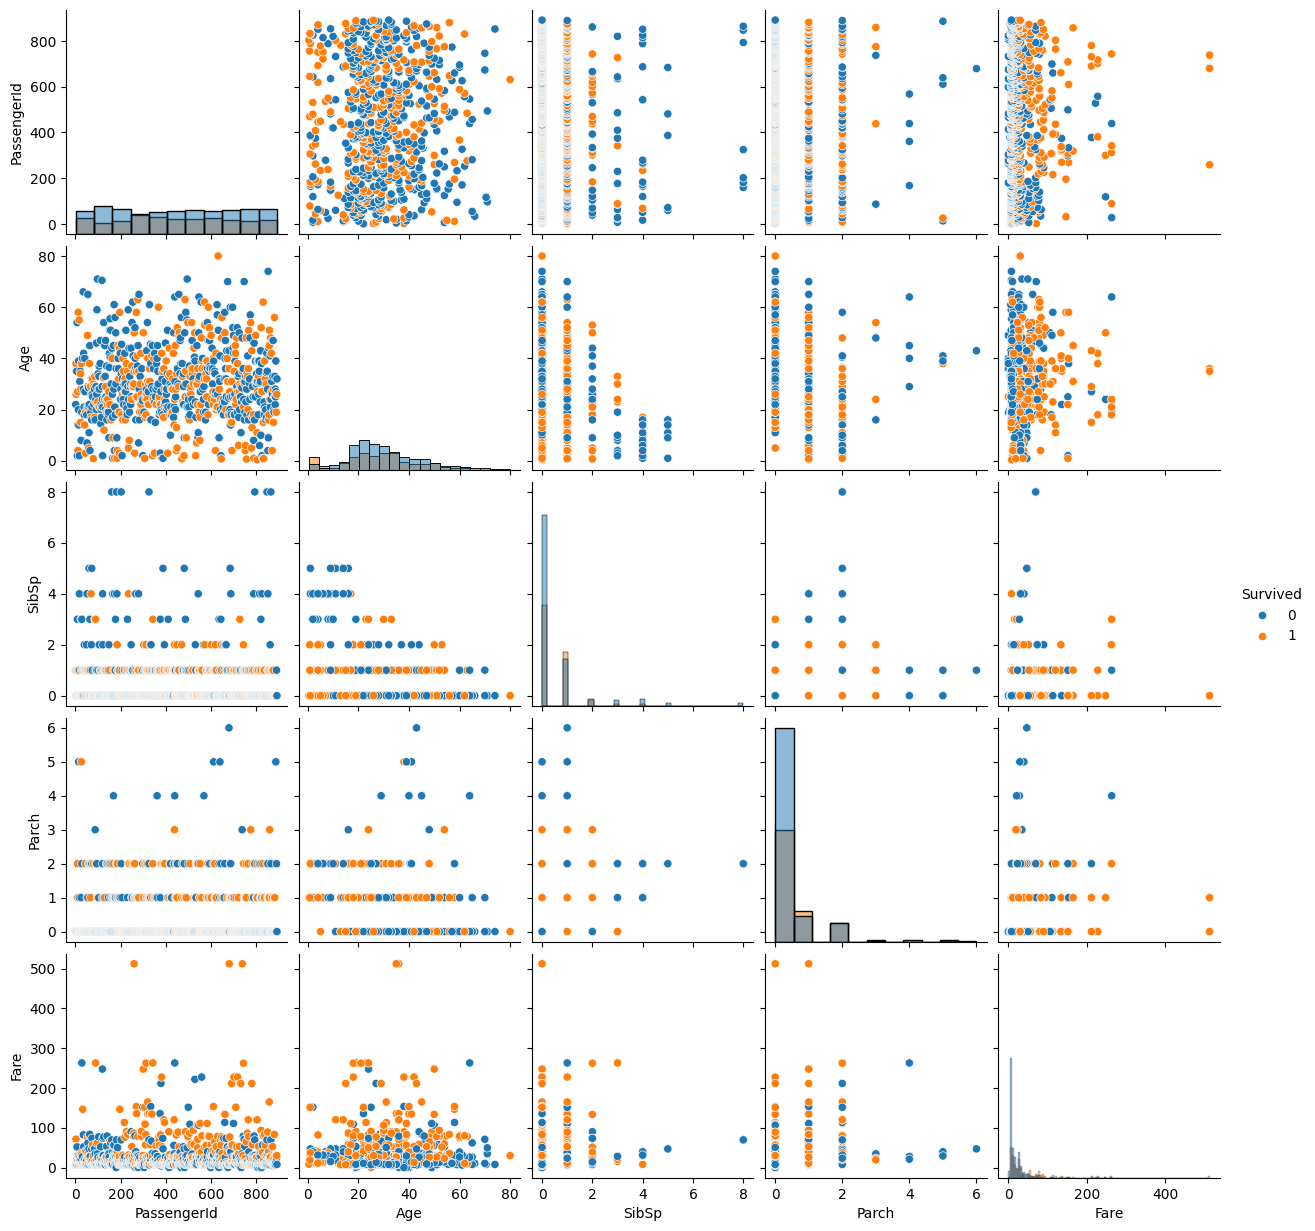

In [85]:
# Numerical features only
sns.pairplot(df, diag_kind="hist", hue="Survived")
plt.show()

# Analyze missing values

<Axes: ylabel='Frequency'>

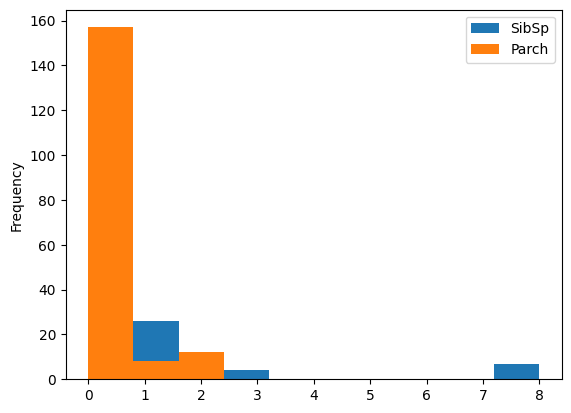

In [30]:
# df.loc[df.isna().any(axis="columns")]
df.loc[df["Age"].isna(), ["SibSp", "Parch"]].plot(kind="hist")

In [ ]:
cat_cols = df.columns[df.dtypes == "object"]
cat_cols
# df.columns[df.dtypes == "int64"]
# df.columns[df.dtypes == "float64"]

cat_cols = ["Sex"]
for col in cat_cols:
    categories = df.groupby(col).size()
    print(categories)

Sex
female    314
male      577
dtype: int64


pandas.core.series.Series

In [4]:
# Pclass, Sex, Age, SibSp, Parch all seem like they should affect rate of survival
# Fare - this could be correlated with Pclass
# Name - how to extract title? 
# Cabin - maybe the number indicates location, which could affect survival?
# Embarked - port of embarcation. Doesn't seem like it should affect survival.

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


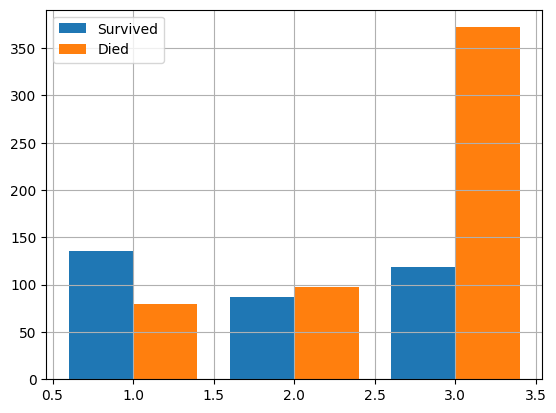

In [5]:
plt.figure()
data = [train_data.loc[train_data["Survived"] == 1]["Pclass"], train_data.loc[train_data["Survived"] == 0]["Pclass"]]
plt.hist(data, bins=[0.5, 1.5, 2.5, 3.5], label=["Survived", "Died"])
plt.legend()
plt.grid()

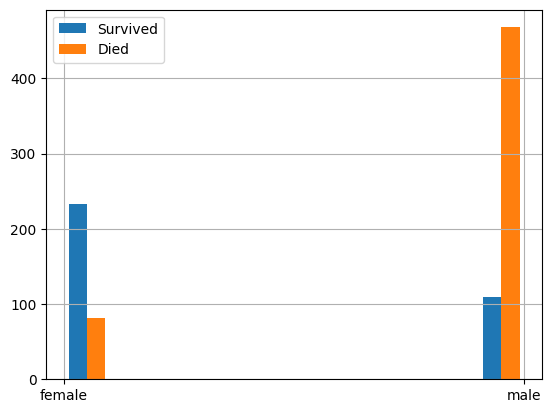

In [6]:
plt.figure()
data = [train_data.loc[train_data["Sex"] == "male"]["Survived"], train_data.loc[train_data["Sex"] == "female"]["Survived"]]
data = [train_data.loc[train_data["Survived"] == 1]["Sex"], train_data.loc[train_data["Survived"] == 0]["Sex"]]
plt.hist(data, label=["Survived", "Died"])
plt.legend()
plt.grid()

In [8]:
grouped = train_data.groupby(["Sex", "Survived"]).count()["Name"]

In [11]:
grouped

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64

In [14]:
print(grouped["female"][0])
print(grouped["female"][1])
print(grouped["male"][0])
print(grouped["male"][1])

81
233
468
109


In [ ]:
(grouped["male"][0] + grouped["female"][1])/len(train_data)

np.float64(0.7867564534231201)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model = LogisticRegression()
model.fit(X, y)
# predictions = model.predict(X_test)
predictions = model.predict(X)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.8002244668911336

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
train_data.groupby(["Age"]).count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,2,1,2
70.50,1,1,1,1,1,1,1,1,1,0,1
71.00,2,2,2,2,2,2,2,2,2,1,2
